<a href="https://colab.research.google.com/github/Antonio171549/Yolov5_Model/blob/main/model_with_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt comet_ml

import torch
import utils
display = utils.notebook_init()

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

In [ ]:
torch.hub.download_url_to_file('https://github.com/ultralytics/assets/releases/download/v0.0.0/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

In [ ]:
logger  = 'TensorBoard'
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
!python train.py --img 640 --batch 32 --epochs 201 --data coco128.yaml --weights yolov5s.pt --cache

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, trust_repo=True)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


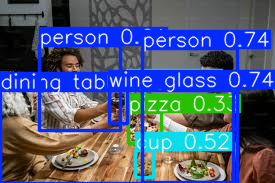

In [36]:
image = '/content/datasets/coco/images/val2017/download.jpg'
result = model(image)
result.show()